IMPORTING LIBRARIES

In [1]:
#Importing the Libraries
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import cm
import missingno as msno
plt.style.use('ggplot')

# styling
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

LOADING DATA

In [2]:
#Read data
df=pd.read_csv('../input/udemy-courses/udemy_courses.csv')

# Print sample
df.sample(5).reset_index(drop=True).style.set_properties(**{'background-color': '#161717','color': '#30c7e6','border-color': '#8b8c8c'})

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1085580,"RSI, Options Trading & Technical Analysis (3 Course Bundle)",https://www.udemy.com/charting-rsi-options-stock-trading-for-beginners-newtechnical-analysis/,True,200,1047,9,46,All Levels,3.500000,2017-01-26T22:55:27Z,Business Finance
1,860890,"Using 'The Greeks To Understand Options""",https://www.udemy.com/options-greeks/,True,50,2134,55,5,All Levels,1.000000,2016-07-13T18:37:40Z,Business Finance
2,1005610,Up and Running with Phalcon,https://www.udemy.com/up-and-running-with-phalcon-php/,True,20,715,12,12,All Levels,1.500000,2016-11-10T15:33:54Z,Web Development
3,1108666,Worship Piano: From Beginner to Pro,https://www.udemy.com/worship-piano-from-beginner-to-pro/,True,80,117,11,32,All Levels,3.000000,2017-02-18T18:03:24Z,Musical Instruments
4,1189592,Learn How To Successfully Trade Forex: In 5 Simple Steps,https://www.udemy.com/learn-how-to-successfully-trade-forex-in-5-simple-steps/,True,95,64,7,44,All Levels,8.500000,2017-05-03T22:09:03Z,Business Finance


About the data <br>
This dataset contains 3.682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy. Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses. This version modifies column names, removes empty columns and aggregates everything into a single csv file for ease of use.

    

  
<h3>Features</h3>
<ul>
<li>course_id - id field for courses</li>
<li>course_title - title field for courses</li>
<li>url - url field to course page</li>
<li>is_paid - boolean field - True for Paid / False for Free</li>
<li>price - price field for course fee</li>
<li>num_subscribers - demand field for each courses</li>
<li>num_reviews - review number for each courses</li>
<li>num_lectures - lecture per course</li>
<li>level - course level by trainee experience</li>
<li>content_duration - course duration in hours</li>
<li>published_timestamp - timestamp field for publication</li>
<li>subject - course type field</li>
</ul>

DATA EXPLORATORY & CLEANING

<h2 style="color:#0B5394;font-size: 1em "><b> Some information on features

In [3]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
df.nunique()

course_id              3672
course_title           3663
url                    3672
is_paid                   2
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64

In [6]:
df.corr()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,-0.057223
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


<h2 style="color:#0B5394;font-size: 1em "><b> Dropping the unwanted features in the dataframe

In [7]:
df.drop(["course_title","url"], axis=1, inplace=True)

In [8]:
df.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#F2C4EE ' ,'color':'black','border-color': '#8b8c8c'}) 

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,427530,True,60,14813,1358,74,All Levels,13.500000,2015-02-23T12:04:53Z,Web Development
1,945750,True,20,1560,43,25,All Levels,3.000000,2016-08-31T22:03:44Z,Business Finance
2,933818,True,40,55,8,13,Beginner Level,1.000000,2017-01-24T23:11:26Z,Musical Instruments
3,218856,True,50,5,0,23,All Levels,3.000000,2014-05-19T16:49:04Z,Musical Instruments
4,880564,True,25,7,0,12,All Levels,1.000000,2016-07-11T17:22:40Z,Business Finance
5,563650,True,40,543,4,12,Beginner Level,1.000000,2015-07-24T22:22:30Z,Musical Instruments


<h2 style="color:#0B5394;font-size: 1em "><b> Convert the data type of some columns, and separate the data needed for analysis

In [9]:
# 'published_timestamp' column -> object to datetime
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

In [10]:
# new 'year' column
df['year']=df['published_timestamp'].dt.year

In [11]:
# 'content_duration' column -> hours to minute
df['content_duration']=(df['content_duration']*60).astype(int)

<h2 style="color:#0B5394;font-size: 1em "><b> Checking for duplicate values

In [12]:
df.duplicated().sum()

6

<h2 style="color:#0B5394;font-size: 1em "><b> Checking for null values

In [13]:
df.isnull().sum()

course_id              0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
year                   0
dtype: int64

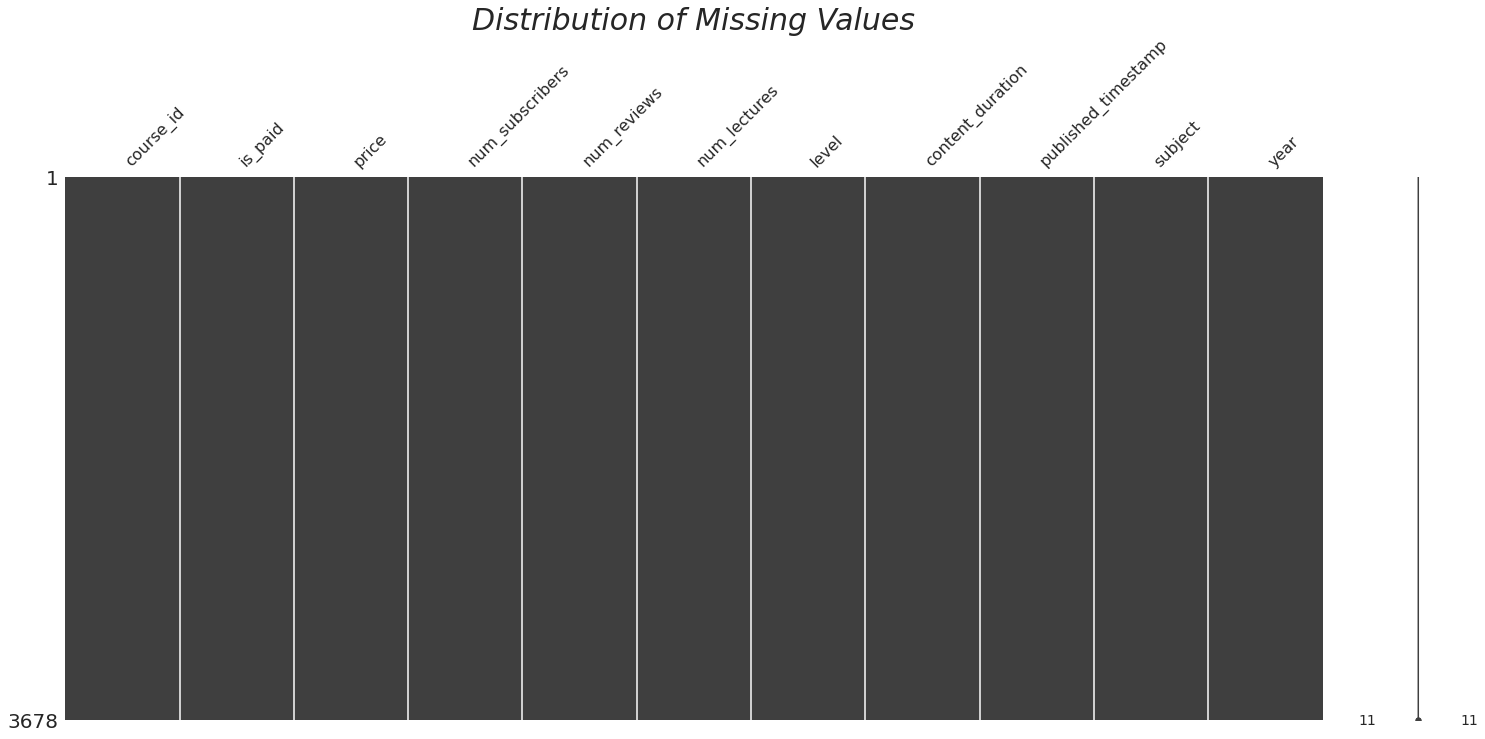

In [14]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

In [15]:
df.shape

(3678, 11)

Result
* **The data have 3678 rows & 12 columns**
* **There is no missing or nan values in data set**


DATA VISUALIZATION & ANALYSIS

<h2 style="color:#0D8D39 ;font-size: 25px "><b> Univarient Analysis

<h2 style="color:#0B5394;font-size: 1em "><b> Getting unique values of each category

In [16]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:white;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')

In [17]:
nunique_df={var:pd.DataFrame(df[var].value_counts())
           for var in {'is_paid', 'level','subject'}}

multi_table([nunique_df['is_paid'],nunique_df['level'],nunique_df['subject']])

,is_paid
True,3368
False,310
,level
All Levels,1929
Beginner Level,1270
Intermediate Level,421
Expert Level,58
,subject
Web Development,1200
Business Finance,1195


<h2 style="color:#0B5394;font-size: 1em "><b> Populatory of course subjects on Udemy

In [18]:
df['tmp'] = 1
fig = px.pie(df, names='subject',values='tmp',hole = 0.6,title='relation tips')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    title_text="Subject percentage",
    annotations=[dict(text='course subjects', x=0.5, y=0.5, font_size=20, showarrow=False)])

Result: 

<h2 style="color:#0B5394;font-size: 1em "><b> Populatory of level on Udemy

In [19]:
df['tmp'] = 1
fig = px.pie(df, names='level',values='tmp',hole = 0.6,title='relation tips')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    title_text="level percentage",
    annotations=[dict(text='course levels', x=0.5, y=0.5, font_size=20, showarrow=False)])

Result:

<h2 style="color:#0D8D39 ;font-size: 25px "><b> Multivarient Analysis (General Exploration)

<h2 style="color:#0B5394;font-size: 1em "><b> Subjects change over years

In [20]:
subject_by_year=pd.pivot_table(df, index='year', columns=['subject'], values='course_id', aggfunc='count')
subject_by_year.fillna(0, inplace=True)
subject_by_year.style.set_properties(**{'background-color': '#F2C4EE ' ,'color':'black','border-color': '#8b8c8c'})

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
year,,,,
2011,0.000000,0.000000,0.000000,5.000000
2012,6.000000,10.000000,10.000000,19.000000
2013,84.000000,23.000000,39.000000,56.000000
2014,192.000000,66.000000,120.000000,113.000000
2015,339.000000,168.000000,171.000000,336.000000
2016,349.000000,181.000000,228.000000,448.000000
2017,225.000000,155.000000,112.000000,223.000000


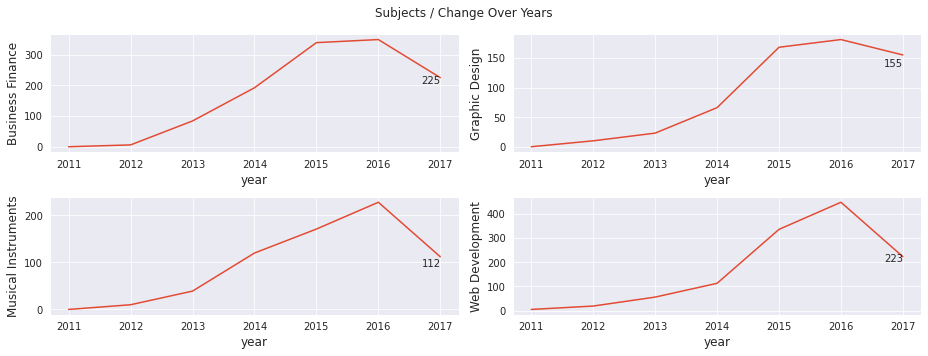

In [21]:
fig, axs = plt.subplots(2,2, figsize=(13,5))
ind = 0
for i in range(2):
    for j in range(2):
        sns.lineplot(x=subject_by_year.index, y=subject_by_year.iloc[:,ind], ax=axs[i,j])
        axs[i,j].text(2016.7,subject_by_year.iloc[-1,ind]-20,int(subject_by_year.iloc[-1,ind]))
        ind +=1
plt.suptitle('Subjects / Change Over Years')
plt.tight_layout();

Result: <br>
From 2011 to 2016, the number of courses per subject increased continuously year by year. Peaked in 2016, then dropped in 2017.

<h2 style="color:#0B5394;font-size: 1em "><b>Plot Rader plot to observe relations between Subject Ratio and Year

In [22]:
subject_year = df.groupby(['year','subject']).size()
subject_2011 = np.round(subject_year[2011].values/subject_year[2011].values.sum(),2)
subject_2012 = np.round(subject_year[2012].values/subject_year[2012].values.sum(),2)
subject_2013 = np.round(subject_year[2013].values/subject_year[2013].values.sum(),2)
subject_2014 = np.round(subject_year[2014].values/subject_year[2014].values.sum(),2)
subject_2015 = np.round(subject_year[2015].values/subject_year[2015].values.sum(),2)
subject_2016 = np.round(subject_year[2016].values/subject_year[2016].values.sum(),2)
subject_2017 = np.round(subject_year[2017].values/subject_year[2017].values.sum(),2)
fig = go.Figure()
categories = ['Business Finance', 'Graphic Design','Musical Instruments','Web Development']
fig.add_trace(go.Scatterpolar(
             r = subject_2011, 
             theta = categories,
             fill = 'toself',
             name = '2011 course subject'
             ))
fig.add_trace(go.Scatterpolar(
             r = subject_2012, 
             theta = categories,
             fill = 'toself',
             name = '2012 course subject'
#              fillcolor = 'lightred'
             ))
fig.add_trace(go.Scatterpolar(
             r = subject_2013, 
             theta = categories,
             fill = 'toself',
             name = '2013 course subject'
#              fillcolor = 'lightblue'
             ))
fig.add_trace(go.Scatterpolar(
             r = subject_2014, 
             theta = categories,
             fill = 'toself',
             name = '2014 course subject'
#              fillcolor = 'lightblue'
             ))
fig.add_trace(go.Scatterpolar(
             r = subject_2015, 
             theta = categories,
             fill = 'toself',
             name = '2015 course subject'
#              fillcolor = 'lightblue'
             ))
fig.add_trace(go.Scatterpolar(
             r = subject_2016, 
             theta = categories,
             fill = 'toself',
             name = '2016 course subject'
#              fillcolor = 'lightblue'
             ))
fig.add_trace(go.Scatterpolar(
             r = subject_2017, 
             theta = categories,
             fill = 'toself',
             name = '2017 course subject'
#              fillcolor = 'lightblue'
             ))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
#       visible=True,
      range=[0, 0.75]
    )),
  font = dict(family="Franklin Gothic", size=17),
  showlegend=True,
  title = 'Rate of course subject by year'
)
fig.layout.template = 'plotly_dark'
fig.show()

<h2 style="color:#0B5394;font-size: 1em "><b> Udemy Courses by level in each year

In [23]:
level_by_year=pd.pivot_table(df, index='year', columns=['level'], values='course_id', aggfunc='count')
level_by_year.fillna(0, inplace=True)
level_by_year.style.set_properties(**{'background-color': '#F2C4EE ' ,'color':'black','border-color': '#8b8c8c'})

level,All Levels,Beginner Level,Expert Level,Intermediate Level
year,,,,
2011,5.000000,0.000000,0.000000,0.000000
2012,33.000000,9.000000,0.000000,3.000000
2013,102.000000,73.000000,9.000000,18.000000
2014,272.000000,155.000000,4.000000,60.000000
2015,587.000000,332.000000,15.000000,80.000000
2016,627.000000,405.000000,11.000000,163.000000
2017,303.000000,296.000000,19.000000,97.000000


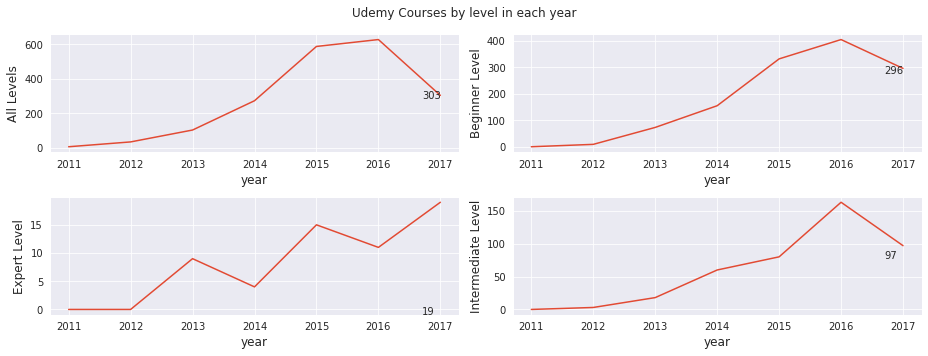

In [24]:
fig, axs = plt.subplots(2,2, figsize=(13,5))
ind = 0
for i in range(2):
    for j in range(2):
        sns.lineplot(x=level_by_year.index, y=level_by_year.iloc[:,ind], ax=axs[i,j])
        axs[i,j].text(2016.7,level_by_year.iloc[-1,ind]-20,int(level_by_year.iloc[-1,ind]))
        ind +=1
plt.suptitle('Udemy Courses by level in each year')
plt.tight_layout();

#### To see more clearly the distribution of course levels, we have the following chart

In [25]:
level_by_year=df.groupby('year')['level'].value_counts().reset_index(level=0).rename(columns={'level':'level count'}, index={'index':'Level_of_Courses'})
level_by_year

,year,level count
level,,
All Levels,2011,5
All Levels,2012,33
Beginner Level,2012,9
Intermediate Level,2012,3
All Levels,2013,102
Beginner Level,2013,73
Intermediate Level,2013,18
Expert Level,2013,9
All Levels,2014,272


In [26]:
fig=px.line(level_by_year, x='year', y='level count', color=level_by_year.index, title='Udemy Courses by level in each year')
fig.show()

Result: <br><br>
From the chart shows:

- Levels: All, Beginner, Intermediate increase each year from 2011 to 2016, decrease in 2017, this increase or decrease depends on the number of open courses that year (as the previous chart analyzed)
- Level Expert has inconsistent rise and fall.

<h2 style="color:#0B5394;font-size: 1em "><b> Number of Subcribers in Course by Year

In [27]:
nsub_by_year=pd.pivot_table(df, index='year', columns=['subject'], values='num_subscribers', aggfunc='sum')
nsub_by_year.fillna(0, inplace=True)
nsub_by_year.style.set_properties(**{'background-color': '#F2C4EE ' ,'color':'black','border-color': '#8b8c8c'})

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
year,,,,
2011,0.000000,0.000000,0.000000,119028.000000
2012,3620.000000,100649.000000,133635.000000,317435.000000
2013,311664.000000,50133.000000,150224.000000,1211417.000000
2014,494623.000000,174582.000000,156152.000000,1105049.000000
2015,501858.000000,352856.000000,190368.000000,2430242.000000
2016,426647.000000,229587.000000,148748.000000,2161662.000000
2017,130299.000000,155341.000000,67562.000000,635739.000000


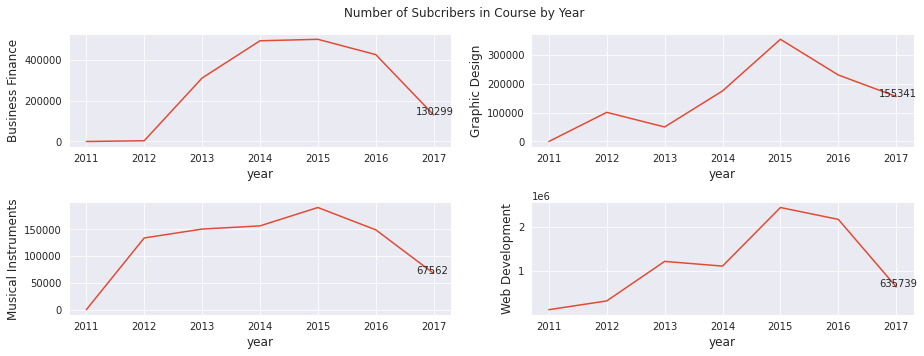

In [28]:
fig, axs = plt.subplots(2,2, figsize=(13,5))
ind = 0
for i in range(2):
    for j in range(2):
        sns.lineplot(x=nsub_by_year.index, y=nsub_by_year.iloc[:,ind], ax=axs[i,j])
        axs[i,j].text(2016.7,nsub_by_year.iloc[-1,ind]-20,int(nsub_by_year.iloc[-1,ind]))
        ind +=1
plt.suptitle('Number of Subcribers in Course by Year')
plt.tight_layout();

Result: <br><br>
- The number of registrants in course topics tended to increase from 2011 to 2015, then decrease in 2016 and 2017.
- Combined with the above analysis, we can see that in 2016 the number of course topics increased but the number of registrations decreased, which may be the cause of the decrease in the number of courses in 2017.

<h2 style="color:#0B5394;font-size: 1em "><b>The distribution of course duration depends on whether the course is paid or not?

In [29]:
fig=px.box(df,
          x='content_duration',
          y='is_paid',
          orientation='h',
          color='is_paid',
          title='Duration Distribution Across Type of Course (charge or free)',
          color_discrete_sequence=['#8ACE12','#AF85D2']
          )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Paid Course')
fig.show()

Result: <br><br>
We can see that paid courses have a higher duration, with an average of 2.5 hours, whereas free courses have a median of 1.5 hours. Paid courses have more variety in content length, even lasting up to 70+ hours, whereas the free course is limited to 21 hours.

<h2 style="color:#0B5394;font-size: 1em "><b>Does the content time allocation depend on the course subject?

In [30]:
fig=px.box(df,
          x='content_duration',
          y='subject',
          orientation='h',
          color='is_paid',
          title='Duration Distribution Across Type of Course (subject)',
          color_discrete_sequence=['#8ACE12','#AF85D2']
          )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Course Subject')
fig.show()

Result: <br><br>
There doesn't seem to be a relationship between Content Duration and Course Subject. But from the chart it can be seen that Subject about Musical Instruments have less content duration.

<h2 style="color:#0B5394;font-size: 1em "><b>Some interplay between factors

In [31]:
def pltplot(data, xcol, ycol,color, ax, title):
    sns.regplot(data=data, x=xcol, y=ycol, color=color, ax=ax).set_title(title, size=10)

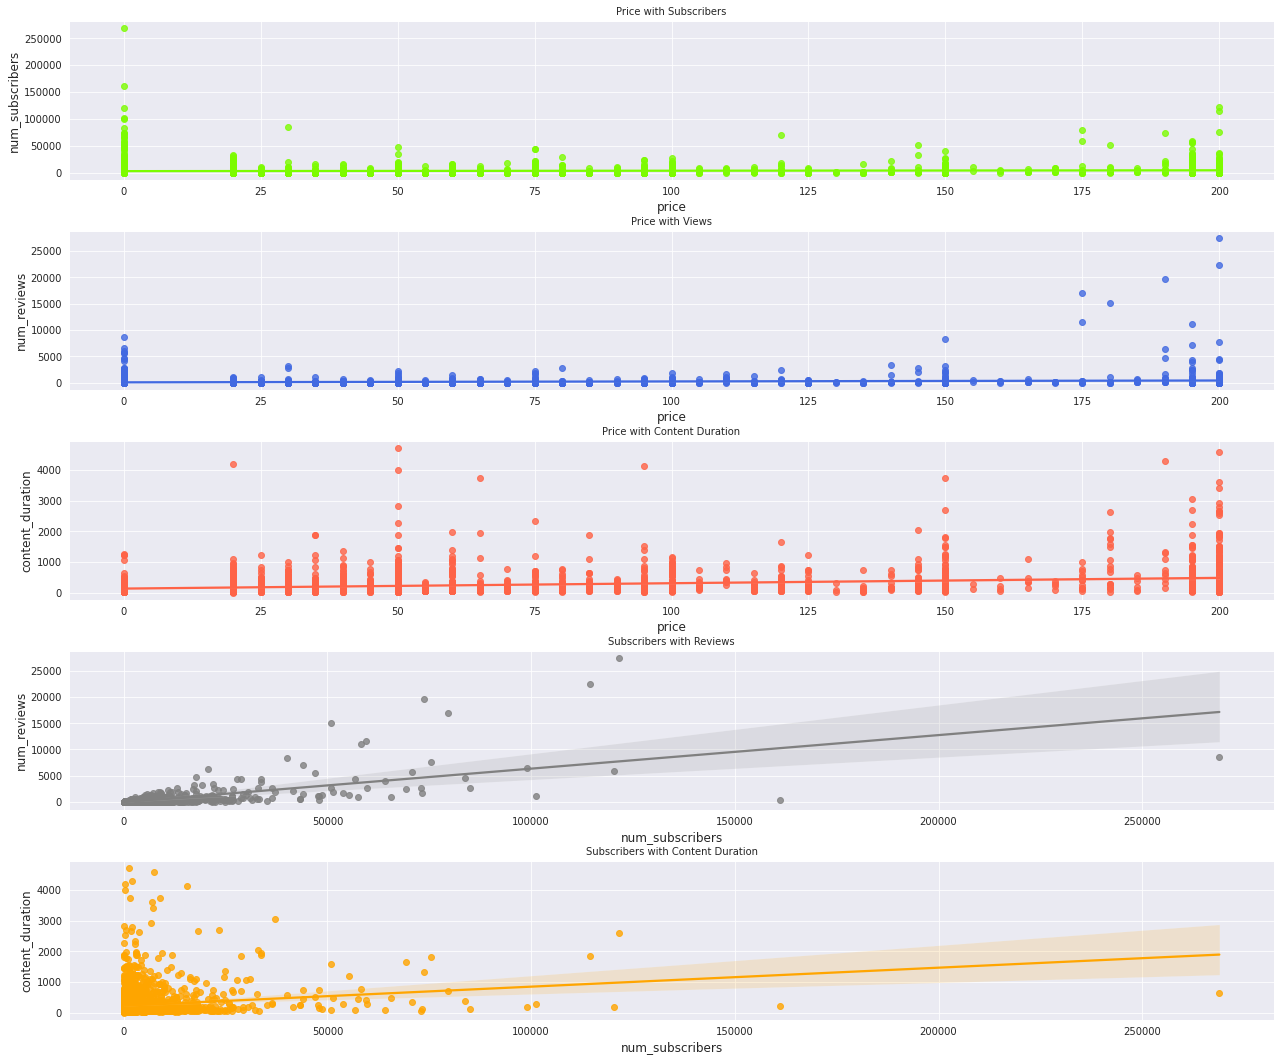

In [32]:
fig, ((ax1),(ax2),(ax3), (ax4), (ax5))=plt.subplots(ncols=1, nrows=5)
fig.set_size_inches(18,15)
fig.tight_layout(pad=3.0)

pltplot(df, 'price','num_subscribers','lawngreen',ax1, 'Price with Subscribers')
pltplot(df, 'price','num_reviews','royalblue', ax2, 'Price with Views')
pltplot(df, 'price','content_duration','tomato', ax3, 'Price with Content Duration')
pltplot(df, 'num_subscribers','num_reviews','gray', ax4,'Subscribers with Reviews')
pltplot(df, 'num_subscribers','content_duration','orange', ax5,'Subscribers with Content Duration')

Result: <br><br>
- Course Price Does Not Affect Subscripers
- Price Does Not Affect Reviews
- Price Does Not Affect Course Duration
- probaly course time affect course subscribers
- More Subscribers leads to more reviews

<h2 style="color:#0B5394;font-size: 1em "><b>Course Subject with num_reviews and num_subscribers

In [33]:
fig = px.scatter(df, x="num_reviews", y="num_subscribers",
                 size="num_subscribers", color="subject",
                 log_x=True, size_max=50,
                 title="Course Subject with num_reviews and num_subscribers",
                 marginal_y='rug')
fig.show()

<h2 style="color:#0B5394;font-size: 1em "><b>Level Course VS No.of Subcribers

In [34]:
px.scatter(df, x = 'num_subscribers', y = 'level', size = 'num_subscribers', hover_name = 'subject', color = 'subject', 
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark',
           animation_frame = 'year', title = 'Level Course VS No.of Subcribers')

<h2 style="color:#0B5394;font-size: 1em "><b>With Paid Course: How are Course Prices Distributed?

In [35]:
# Filter paid courses
paid_courses_df = df.query("price != 'Free'")
paid_courses_df['price'] = df['price'].astype('float32')

In [36]:
fig = px.box(paid_courses_df,
             x     = 'subject',
             y     = 'price',
             color = 'subject',
             title = 'Course Prices x Subject',
             color_discrete_sequence = ['#03cffc','#0362fc','#eb03fc','#0ecc83'],
            )

fig.update_layout(showlegend=False)
fig.update_yaxes(range=[0,220], title='Course Price')
fig.update_xaxes(title='Course Subject')
fig.show()

<h2 style="color:#0B5394;font-size: 1em "><b>The heat chart depicts the correlation

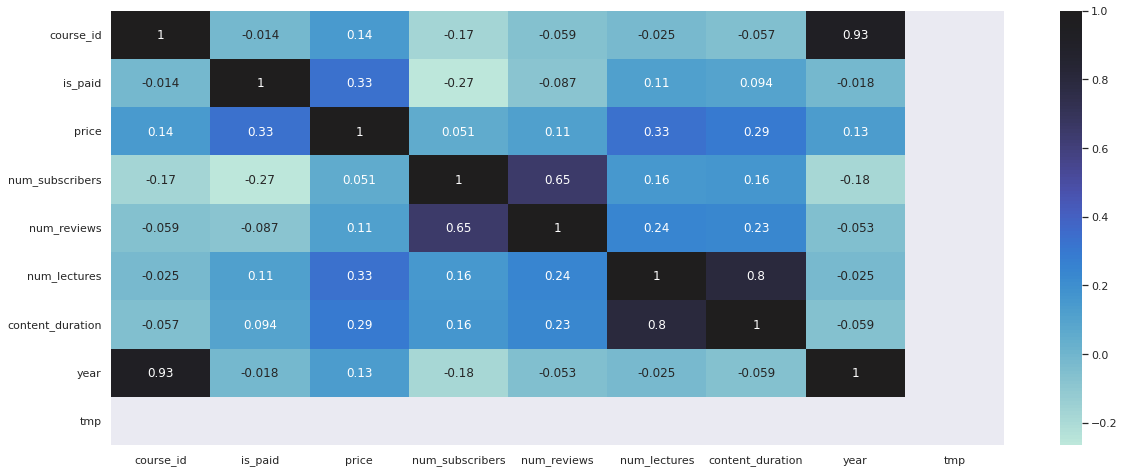

In [37]:
plt.figure(figsize=(20,8))
sns.set_theme('notebook')
sns.heatmap(df.corr(), annot=True, center=True);

<h2 style="color:#0B5394;font-size: 1em "><b>Word Cloud of Subject Titles

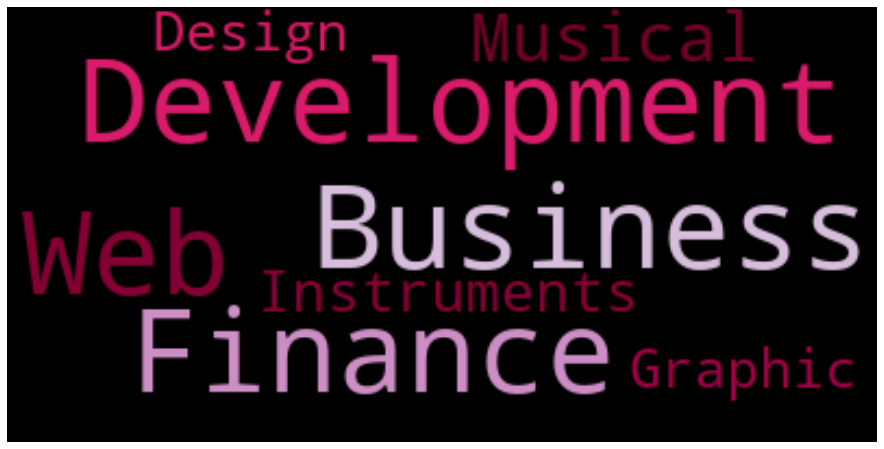

In [38]:
text = " ".join(subject_titles for subject_titles in df["subject"])
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap = 'PuRd', min_font_size = 8).generate(text)
plt.figure(figsize = (20, 8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()